# Mushroom Hunting
Lab Assignment One: Exploring Table Data

**_Jake Oien, Seung Ki Lee, Jenn Le_**

## Business Understanding

This data can be useful in identifying trends in poisonous mushrooms and assist in the classification of unknown mushrooms.

From the dataset's description: 
"This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy."

According to http://www.amjbot.org/content/98/3/426.full there are estimated to be upwards of 5 million species of fungi, with only around 100,000 of them having been discovered and documented. At estimated discovery rates of 1200 species per year, scientists estimate it could take as long as 4000 years to discover all species of fungi. 

What this means is that only the tip of the iceberg has been studied as far as fungi is concerned. The dataset mentions that "shrooming" is experiencing a boom in popularity. With such a low percentage of documented fungi, it's possible that someone walking through a forest could happen upon a species of mushroom that's never been seen. People are curious, and someone is bound to want to try eating this strange mushroom. 

The end goal of analysing a dataset like this would be to classify an unknown specimen of mushroom as edible or poisonous. As the Audobon Society Field Guide says, "there is no simple rule for determining the edibility of a mushroom." This might be true. But, there may be some underlying pattern between a collection of variables in a mushroom that might provide a (slightly more complex) rule for if a mushroom is poisonous or not. This may not be a "sexy" avenue of research for machine learning, but a successful classification algorithm could open a door into further research to help better understand broader categories of fungi, and better understanding about the life with which we share the planet.

### Measure of success

Now, to discuss what a successful algorithm actually means, or, how do we determine if a machine learning algorithm is a success on this dataset. 

If the algorithm is learning properly, we should expect the success rate to be better than random chance (in this case 50%). Obviously, we should not expect to achieve a 100% success rate, but we should strive for as close as possible. There are two main "users" that could benefit from a successful classification, one being a scientist and the other being a potential consumer of unknown mushrooms. 

A scientist might look at the data and say that a 90% true positive rate on classification is "good enough" for further research, and digging into why certain classifications failed or succeeded might provide more insight into mushrooms as a whole. A success rate around that range would show that the algorithm is sound, and perhaps just needs some fine tuning or more data to achieve a higher success rate. 

However, the consumer of unknown mushrooms should not be content with a 90% true positive rate. False negatives would not be of a concern. They're not missing out on much except a new experience, after all. However, a 10% false positive rate would mean that 1 out of 10 times, an app that tells you "This mushroom is safe to eat" would be wrong and you would die. In order to be used on a consumer level, a very low false positive rate would be required to be remotely acceptable. To answer the question of if the machine learning algorithm is acceptable for use in aiding a "mushroom enthusiast," we should look at other levels of risk that are accepted in similar situations. 

Fugu (pufferfish) is dish that if prepared improperly, can cause at the least severe poisoning and at worst death. Despite that, people still eat the dish, because they trust that the chef who prepares it knows what they are doing.  According to http://www.fukushihoken.metro.tokyo.jp/shokuhin/hugu/, 354 people in Japan suffered adverse effects from eating poorly prepared fugu over the last 10 years. The statistic for how many people ate fugu in that time is not known, but we can come up with a skeptical number to compare that adverse effect rate to the false positive rate of the algorithm. According to http://www.worldometers.info/world-population/japan-population/, Japan's current population is just under 126 million people. Of course, everyone in Japan did not eat fugu in that time. So if we use a conservative estimate that 1% of the population ate fugu one time during that 10 year period we get:

In [18]:
adverse_effects = 354
japanese_population = 125000000
total_fugu_consumption_estimate = japanese_population/100 # 1% of the population ate fugu one time

print("Estimated rate of adverse effects due to fugu consumption: {}"
      .format(adverse_effects/total_fugu_consumption_estimate))

Estimated rate of adverse effects due to fugu consumption: 0.0002832


This is one means by which an algorithm should be held to a false positive rate. This is just an estimate, because without per capita consumption estimates, a best guess is all we can hope for. However, at the bare minimum, someone should be more confident in the algorithm telling them that a random mushroom is safe to eat than they should be that their highly trained chef in a controlled environment prepared their deadly dish properly. Thus, the requirements for success for human consumption are (obviously) quite high. 

Dataset Source: https://www.kaggle.com/uciml/mushroom-classification

## Data Understanding

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('./mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data Value Replacements

We're unable to get a picture for what this dataset actually is because we don't know what the labels mean. In order to make it more intuitive, we replace the labels with more meaningful values, descriptive labels or variable representations where it makes sense.

Just to provide a clearer picture of the dataset, we will change the labels to their full-word definition. Later, we will one-hot encode most of the dataset and scale the rest as appropriate to prepare it for use in Tensorflow. 

In [20]:
# Changing column names
for col_name, col in df.iteritems():
    df.rename(columns={col_name:col_name.replace('-', '_')}, inplace=True)

# Replacing data values, also shows the possible values for each attribute
df["class"].replace(to_replace=['e', 'p'],
                     value=["non-poisonous", "poisonous"], inplace=True)

df.cap_shape.replace(to_replace=['b', 'c', 'x', 'f', 'k', 's'],
                     value=["bell", "conical", "convex", "flat", "knobbed", "sunken"],
                     inplace=True)

df.cap_surface.replace(to_replace=['f', 'g', 'y', 's'],
                     value=["fibrous", "grooves", "scaly", "smooth"], 
                     inplace=True)

df.cap_color.replace(to_replace=['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "green", "pink", 
                            "purple", "red", "white", "yellow"], 
                     inplace=True)

df.bruises.replace(to_replace=['f', 't'],
                     value=[0, 1], 
                     inplace=True)

df.odor.replace(to_replace=['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
                     value=["almond", "anise", "creosote", "fishy", "foul", 
                            "musty", "none", "pungent", "spicy"], 
                     inplace=True)

df.gill_attachment.replace(to_replace=['a', 'd', 'f', 'n'],
                     value=["attached", "descending", "free", "notched"], 
                     inplace=True)

df.gill_spacing.replace(to_replace=['c', 'w', 'd'],
                     value=["close", "crowded", "distant"], 
                     inplace=True)

df.gill_size.replace(to_replace=['b', 'n'],
                     value=["broad", "narrow"], 
                     inplace=True)

df.gill_color.replace(to_replace=['k', 'n', 'b', 'h', 'g', 'r', 'o', 
                                  'p', 'u', 'e', 'w', 'y'],
                     value=["black", "brown", "buff", "chocolate", "gray", 
                            "green", "orange", "pink", "purple", "red", "white", "yellow"], 
                     inplace=True)

df.stalk_shape.replace(to_replace=['e', 't'],
                     value=["enlarging", "tapering"], 
                     inplace=True)

df.stalk_root.replace(to_replace=['b', 'c', 'u', 'e', 'z', 'r', '?'],
                     value=["bulbous", "club", "cup", "equal", "rhizomorphs", 
                            "rooted", "missing"], 
                     inplace=True)

df.stalk_surface_above_ring.replace(to_replace=['f', 'y', 'k', 's'],
                     value=["fibrous", "scaly", "silky", "smooth"], 
                     inplace=True)

df.stalk_surface_below_ring.replace(to_replace=['f', 'y', 'k', 's'],
                     value=["fibrous", "scaly", "silky", "smooth"], 
                     inplace=True)

df.stalk_color_above_ring.replace(to_replace=['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "orange", 
                            "pink", "red", "white", "yellow"], 
                     inplace=True)

df.stalk_color_below_ring.replace(to_replace=['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "orange", 
                            "pink", "red", "white", "yellow"], 
                     inplace=True)

df.veil_type.replace(to_replace=['p', 'u'],
                     value=["partial", "universal"], 
                     inplace=True)

df.veil_color.replace(to_replace=['n', 'o', 'w', 'y'],
                     value=["brown", "orange", "white", "yellow"], inplace=True)

df.ring_number.replace(to_replace=['n', 'o', 't'],
                     value=[0, 1, 2], inplace=True)

df.ring_type.replace(to_replace=['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
                     value=["cobwebby", "evanescent", "flaring", "large", 
                            "none", "pendant", "sheathing", "zone"], 
                     inplace=True)

df.spore_print_color.replace(to_replace=['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
                     value=["black", "brown", "buff", "chocolate", "green", 
                            "orange", "purple", "white", "yellow"], 
                     inplace=True)

df.population.replace(to_replace=['a', 'c', 'n', 's', 'v', 'y'],
                     value=["abundant", "clustered", "numerous", "scattered", 
                            "several", "solitary"], 
                     inplace=True)

df.habitat.replace(to_replace=['g', 'l', 'm', 'p', 'u', 'w', 'd'],
                     value=["grasses", "leaves", "meadows", "paths", "urban", 
                            "waste", "woods"], 
                     inplace=True)

df.head(10)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,1,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,non-poisonous,convex,smooth,yellow,1,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,non-poisonous,bell,smooth,white,1,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,1,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,non-poisonous,convex,smooth,gray,0,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses
5,non-poisonous,convex,scaly,yellow,1,almond,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,black,numerous,grasses
6,non-poisonous,bell,smooth,white,1,almond,free,close,broad,gray,...,smooth,white,white,partial,white,1,pendant,black,numerous,meadows
7,non-poisonous,bell,scaly,white,1,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,scattered,meadows
8,poisonous,convex,scaly,white,1,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,1,pendant,black,several,grasses
9,non-poisonous,bell,smooth,yellow,1,almond,free,close,broad,gray,...,smooth,white,white,partial,white,1,pendant,black,scattered,meadows


In [21]:
# Percentage of possibly poisonous mushrooms in the dataset
sum(df["class"]=="poisonous")/len(df)*100.0

48.202855736090591

### Data Quality

There are two things we look for to determine data quality; missing values and duplicate data. First, we'll look for missing values. 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null int64
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number 

We see that there are 8124 rows in the data set, and that no rows have any missing columns. So, from that point, the data is good. Now we should check for duplicate rows in the dataset. 

In [23]:
duplicate_count = 0
for val in df.duplicated():
    if val == 'True':
        duplicate_count += 1

print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


We see that there are no duplicate rows in this dataset either. 

The lack of duplicate rows and the fact that none of the columns are missing any values makes sense, as the description for the dataset says itself that the dataset has been lightly cleaned before publication. 

In [24]:
print("Number of poisonous mushrooms in set: {}".format(len(df[df["class"] == "poisonous"])))

Number of poisonous mushrooms in set: 3916


### Evaluation Criteria

As we discussed in our opening analysis, the focus of this dataset would be to assist someone in determining if a mushroom is safe to eat or not based on its features. So, the important measure here would be the recall score of the classification. We don't necessarily care if the algorithm successfully classifies non-poisonous mushrooms. If a mushroom is not poisonous, and we say it is, all that means is that we are being more "cautious" with our recommendation of eating said mushroom. All we care about is that if we tell someone a mushroom is safe to eat, we are correct. We don't know what an acceptable margin of error would be here (we think it would be unreasonable to expect absolutely 100% recall on any possible dataset), but from our sample of >8,000 mushrooms with almost 4,000 poisonous mushrooms, we think that we should be able correctly classify every poisonous mushroom for our model to be even considered to be used in a real setting.

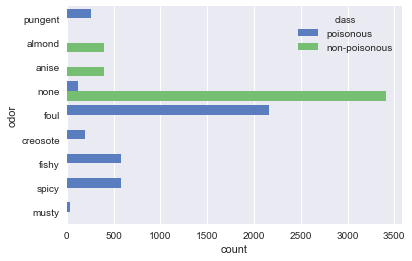

In [25]:
# Grouping by odor and seeing the percentage of poisonous mushrooms
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
# df_grouped_odor = df.groupby(by=["odor", "class"])

sns.countplot(y=df.odor, hue=df["class"], palette="muted");

We can see from this graph that a human could probably look at this graph and correctly classify a mushroom based on its odor. All mushrooms with a distinct odor fall into a single class. A decent machine learning model should be able to easily classify mushrooms with our dataset with the odor included. If it does too well, we may consider dropping the odor category from the dataset and seeing how the network does without such a clear indicator. This would be useful because someone may not be able to accurately identify the scent of a mushroom, either because it is too weak of a scent or the scent is not able to be identified. So, as we go, we may decide to leave out the odor from training and testing. 

When we have finished the general architecture for our networks, we may also consider removing some of the other classes from the set, to better mimic a deployment of an app to help you determine if a mushroom is poisonous. The app may be able to perform just as well with a subset of the classes, which would make filling out a form on the app easier and more likely to be used. Additionally, some of the values for these classes, like "pendant" or "sheathing" for the mushroom's ring type, might be too unfamiliar to a novice shroomer and thus not useful. If our model can still work with less features to train on, that would make it more accessible for general use. 

It is important to note that we have a limited dataset to work with. The dataset consists solely of samples from two genuses of mushrooms in North America. What we are doing here is testing if our model can work with data it's given and perform well by testing it on data collected from that same population. Thus, our model should not be deployed on a worldwide basis, given that we do not have data from worldwide species of mushrooms. If it is to be used in a worldwide setting, it should be given a worldwide data source, and would need to be retrained on that dataset. 

### Validation

For our validation technique, we will be using stratified 10-fold cross validation. First, it's important to look at the class distribution of the dataset. 

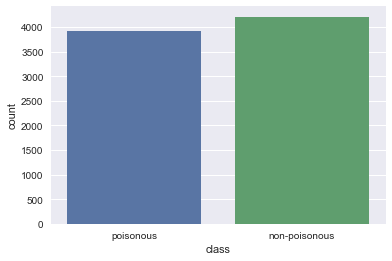

In [26]:
sns.countplot(x="class", data=df);

The dataset does not have a large class imbalance, so that removes one of the benefits for using a stratified method. However, another benefit of a stratified method is to ensure a level of uniformity in the training. We would like to train a model on as many differing datasets as possible, so we can do a reasonable job of estimating generalization performance. We do not have knowledge about the average distributions of poisonous mushrooms throughout the world. We do know that these mushrooms specifically came from species of North American mushrooms. We don't know how the data were collected, and so we will use the stratified method to preserve the class distributions, because we will assume that the samples are representative of the sample size. 

Now, why are we using 10-fold cross validation? We are using 10 folds because we feel that will give us a good trade-off between amount of training data and distributions of our scoring measure to evaluate the effectiveness of the models. One possible gotcha will be if the 10 folds can each capture a large enough portion of each of the categorical feature values to train up that set of weights. For example, as we saw earlier in the odor graph, there appear to be less than 100 instances that have a musty smell. It might be the case that some folds do not grab enough of that subset to be able to train its weight effectively. If our scoring measure is not as good as we would like, that might be one area to look at for training. That is, to stratify the dataset on the feature values as well as the classes. 

We will also note that using 10-fold cross validation is only our way of estimating generalization performance on the dataset. In our final deployment scenario, we would train a model on all of the data we have available to us and then ship that model off to our product, at which point we would measure its performance in the wild with entirely new data.

### Data preparation

Now we will prepare the data for use in Tensorflow. First we will encode the categorical fields as integer values using sklearn's LabelEncoder, and we will scale the two numeric fields. Then, when we create the model, we will one hot encode the integer fields. 

In [27]:
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

def create_new_data_frame(df, included_features, numeric_headers):
#     numeric_headers = ["bruises", "ring_number"]
    categorical_headers = [col for col in included_features if col not in numeric_headers]

    df_processed = deepcopy(df)
    all_features = included_features+["class"]
    drop_cols = [col for col in df.columns if col not in included_features+["class"]]
    print (drop_cols)
    df_processed = df_processed.drop(drop_cols, axis=1)
    
    print("Numeric headers: {}".format(numeric_headers))
    print("Categorical headers: {}".format(categorical_headers))

    encoders = dict() 

    for col in categorical_headers+['class']:
#         df_processed[col] = df_processed[col].str.strip()

        if col=="class":
            tmp = LabelEncoder()
            df_processed[col] = tmp.fit_transform(df_processed[col])
        else:
            encoders[col] = LabelEncoder()
            df_processed[col+'_int'] = encoders[col].fit_transform(df_processed[col])


    for col in numeric_headers:
        df_processed[col] = df_processed[col].astype(np.float)

        ss = StandardScaler()
        df_processed[col] = ss.fit_transform(df_processed[col].values.reshape(-1, 1))

    categorical_headers_ints = [x+'_int' for x in categorical_headers]
    feature_columns = categorical_headers_ints+numeric_headers
    
    return deepcopy(df_processed), categorical_headers_ints, numeric_headers, feature_columns
    
    
numeric_headers = ["bruises", "ring_number"]
included_features = list(df.columns)
included_features.remove("class")
df_processed, categorical_headers_ints, numeric_headers, feature_columns = create_new_data_frame(df, included_features, numeric_headers)

df_processed.head()

[]
Numeric headers: ['bruises', 'ring_number']
Categorical headers: ['cap_shape', 'cap_surface', 'cap_color', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_type', 'spore_print_color', 'population', 'habitat']


,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring_int,stalk_surface_below_ring_int,stalk_color_above_ring_int,stalk_color_below_ring_int,veil_type_int,veil_color_int,ring_type_int,spore_print_color_int,population_int,habitat_int
0,1,convex,smooth,brown,1.185917,pungent,free,close,narrow,black,...,3,3,7,7,0,2,4,0,3,4
1,0,convex,smooth,yellow,1.185917,almond,free,close,broad,black,...,3,3,7,7,0,2,4,1,2,0
2,0,bell,smooth,white,1.185917,anise,free,close,broad,brown,...,3,3,7,7,0,2,4,1,2,2
3,1,convex,scaly,white,1.185917,pungent,free,close,narrow,brown,...,3,3,7,7,0,2,4,0,3,4
4,0,convex,smooth,gray,-0.843230,none,free,crowded,broad,black,...,3,3,7,7,0,2,0,1,0,0


## Modeling

Currently, we create a single layer of the sparse and deep layer combined. 

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Merge, concatenate
from keras.models import Model

### A combined wide and deep network

Most of this code was taken from our boi Eric Larson's notebook "10. Keras Wide and Deep". 

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt

def create_model(X_train, X_test, X_train_num, categorical_headers_ints):
#     we need to create separate sequential models for each embedding
    cross_columns = [['cap_shape','cap_surface', 'cap_color'],
         ['gill_attachment', 'gill_spacing', 'gill_size', 'gill_color'],
            ['stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring'],
            ['veil_type', 'veil_color']]

    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(x), axis=1)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(x), axis=1)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32',name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_branch_outputs)

    # reset this input branch
    all_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
    x = Dense(units=20, activation='relu')(all_inputs[-1])
    all_branch_outputs.append( x )

    # merge the branches together
    deep_branch = concatenate(all_branch_outputs)
    deep_branch = Dense(units=50,activation='sigmoid')(deep_branch)
    deep_branch = Dense(units=10,activation='sigmoid')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch])
    final_branch = Dense(units=1,activation='sigmoid')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)
    return model, X_ints_train, X_ints_test, X_train_num

In [30]:
%%time
num_folds = 10

X = df_processed[feature_columns].values
y = df_processed["class"].values

scores = []

skf = StratifiedKFold(n_splits=num_folds, shuffle=True)
for i, (train, test) in enumerate(skf.split(X, y)):
    print(f"Fold {i}")
    
    X_train = df_processed.iloc[train]
    X_test = df_processed.iloc[test]
    y_train = df_processed["class"].iloc[train]
    y_test = df_processed["class"].iloc[test]
    
    ohe = OneHotEncoder()
    X_train_ohe = ohe.fit_transform(X_train[categorical_headers_ints].values)
    X_test_ohe = ohe.transform(X_test[categorical_headers_ints].values)

    X_train_num = X_train[numeric_headers].values  # already scaled
    X_test_num = X_test[numeric_headers].values
    
#     model = create_model(X_train_ohe, X_train_num)
    model, X_ints_train, X_ints_test, X_train_num = create_model(X_train, X_test, X_train_num, categorical_headers_ints)
    
    model.compile(optimizer='adagrad',
                  loss='mean_squared_error',
                  metrics=['accuracy'])
#     X_crossed_train, X_crossed_test, model = create_model_wide(X_train, X_test)
#     model.fit([X_train_ohe,X_train_num],y_train, epochs=10, batch_size=50, verbose=0)
    model.fit(X_ints_train + [X_train_num], y_train, epochs=20, batch_size=50, verbose=1)

#     yhat = np.round(model.predict([X_test_ohe,X_test_num]))
    yhat = np.round(model.predict(X_ints_test + [X_test_num]))
    print(mt.confusion_matrix(y_test,yhat))
    score = mt.recall_score(y_test, yhat)
    scores.append(score)
    print("Recall: ", score)

Fold 0
Epoch 1/20
7311/7311 [==============================] - 1s - loss: 0.1039 - acc: 0.9070     
Epoch 2/20
7311/7311 [==============================] - 0s - loss: 0.0292 - acc: 0.9845     
Epoch 3/20
7311/7311 [==============================] - 0s - loss: 0.0134 - acc: 0.9956     
Epoch 4/20
7311/7311 [==============================] - 0s - loss: 0.0084 - acc: 0.9966     
Epoch 5/20
7311/7311 [==============================] - 0s - loss: 0.0062 - acc: 0.9971     
Epoch 6/20
7311/7311 [==============================] - 0s - loss: 0.0049 - acc: 0.9981     
Epoch 7/20
7311/7311 [==============================] - 0s - loss: 0.0040 - acc: 0.9985     
Epoch 8/20
7311/7311 [==============================] - 0s - loss: 0.0034 - acc: 0.9989     
Epoch 9/20
7311/7311 [==============================] - 0s - loss: 0.0030 - acc: 0.9988     
Epoch 10/20
7311/7311 [==============================] - 0s - loss: 0.0026 - acc: 0.9990     
Epoch 11/20
7311/7311 [==============================] - 0s - 

7313/7313 [==============================] - 0s - loss: 0.0024 - acc: 0.9996     
Epoch 12/20
7313/7313 [==============================] - 0s - loss: 0.0021 - acc: 0.9997     
Epoch 13/20
7313/7313 [==============================] - 0s - loss: 0.0019 - acc: 0.9997     
Epoch 14/20
7313/7313 [==============================] - 0s - loss: 0.0017 - acc: 0.9999     
Epoch 15/20
7313/7313 [==============================] - 0s - loss: 0.0016 - acc: 0.9999     
Epoch 16/20
7313/7313 [==============================] - 0s - loss: 0.0015 - acc: 1.0000     
Epoch 17/20
7313/7313 [==============================] - 0s - loss: 0.0014 - acc: 1.0000     
Epoch 18/20
7313/7313 [==============================] - 0s - loss: 0.0013 - acc: 1.0000     
Epoch 19/20
7313/7313 [==============================] - 0s - loss: 0.0012 - acc: 1.0000     
Epoch 20/20
7313/7313 [==============================] - 0s - loss: 0.0011 - acc: 1.0000     
[[420   0]
 [  0 391]]
Recall:  1.0
Fold 9
Epoch 1/20
7313/7313 [=======

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


<Container object of 10 artists>

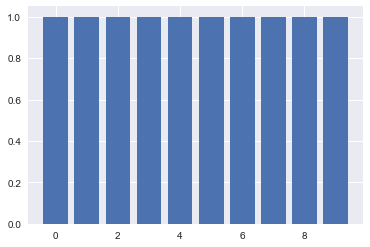

In [31]:
folds = list(range(0,num_folds))
print(scores)

plt.bar(folds, scores)

Our initial model was good. However, our deployment is in an app where people enter the values of these features. Some of these features may be subjective and could potentially introduce a human error into the mix. We should take a closer at these features and try out our model on a subset of features, and only include features we think are objective or less likely to be messed up. 

|            Feature             | Sample Values                       |               Explanation                | Include | Sample Image |
| :----------------------------: | :---------------------------------- | :--------------------------------------: | :-----: | :----------: |
|           Cap Shape            | Bell<br/>Conical<br/>Convex         |          Fairly objective trait          |  True  | ![cap_shape](img/cap_shape.jpg) |
|           Cap Color            | Red<br/>Brown<br/>Cinammon          |     Difficult to tell apart colors like brown vs cinammon by eyes     |  False  |![brown](img/brown-fibrous.jpg)|
|          Cap Surface           | Fibrous<br/>Smooth<br/>Scaly        |         Easily distinguishiable          |  True   | ![cap_surface](img/cap_surface.jpg)  |
|            Bruises             | Exist<br/>Not Exist                 |  Non Numeric Feature, Easily Noticeable by spots when pressed  |  True   | ![bruise](img/bruise.jpg) |
|              Odor              | Anise<br/>Cresote<br/>Pungent       | Too specific for untrained noses, easily confused |  False  |  N/A          |
|        Gill Attachment         | Attached<br/>Descending<br/>Free    |     Will simplify to attached or Not     |  True   | ![gill attach](img/gil_attach.jpg) |
|          Gill Spacing          | Close<br/>Crowded<br/>Distant       | Too detailed for untrained eyes, adjust to close/distant |  True   | ![title](img/gil_spacing.jpg) |
|           Gill Size            | Broad<br/>Narrow                    | We can't define what is broad or narrow, and images on the net don't provide much assistance. If we had examples we could include it, but we don't so we will leave out gill size. |  False  | N/A    |
|          Stalk Shape           | Enlarging<br/>Tapering              |      Easily noticeable difference.       |  True   | ![stalk shape](img/stalk_shape.jpg) |
|           Stalk Root           | Bulbous<br/>Club<br/>Cup<br/>       | With pictures it is easily distinguishable |  True   | ![stalk root](img/stalk_root.jpg) |
| Stalk Surface Above/Below Ring | Fibrous<br/>Scaly<br/>Smooth<br/>   | With assistance of image easily distinguishable. |  True   | ![stalk surface](img/stalk_surface.jpg)        |
|  Stalk Color Above/Below Ring  |  Brown<br/>Buff<br/>Cinammon        |    Difficult to tell the color apart     |  False  | ![stalk color](img/stalk_color.jpg) |
|           Veil Type            | Partial<br/>Universal               | According to https://en.wikipedia.org/wiki/Partial_veil, a mushroom can have a partial and/or universal veil so it's not a distinguishable factor. |  False  | ![veil type](img/veil_type.jpg) |
|           Veil Color           | Brown<br/>Orange<br/>White          |      Easy to tell apart the colors       |  True   |![veil color](img/veil_color.jpg)  |
|           Ring Type            | Cobwebby<br/>Evanescent<br/>Flaring |    With image easily distinguishable     |  True   | ![ring type](img/ring_type.jpg) |
|          Ring Number           | 0<br/>1<br/>2                       | Most of the mushrooms have 1 ring, with its ratio of poisonous vs edible essentially being chance. |  False  |  N/A  |
|       Spore Print Color        | Buff<br/>Brown<br/>Chocolate        | Very hard to distinguish these colors and are up to interpretation. |  False  | ![spore color](img/spore_color.jpg) |
|           Population           | Abandant<br/>Clustured<br/>Numerous | Difficult to verify the quantities, but with image assistance will be distinguishable |  False   | N/A so we cannot verify this  |
|            Habitat             | Grass<br/>Path<br/>Waste            |     Easy to distinguish the terrain      |  True   | N/A |

Cap shape - values Bell, conical, convex, flat, knobbed, sunken. We think these values are not subjective and can be included in an analysis. 

Cap color - Some values are very close to one another, like red, brown, and cinnamon. We think this would induce confusion and will try not including it. 

Cap surface - Fibrous, grooved, scaly, smooth. If we include pictures of these, we think that people could tell them apart so we will include

Bruises: true or false. Easy to distinguish, so included. Also, we realized that this is not a numeric feature so we will be fixing that. 

Odor: Anise, creosote, pungent, musty, etc. We think that these are a bit too specific for a new shroomer. We will exclude this, and as we discussed earlier, we will likely do worse at classification because odor is such a distinct classifier. 

Gill attachment: attached, descending, free, notched. We will come back later and simplify to attached or not, for now not included TODO < this

Gill spacing: Close, crowded, distant. Crowded and close might be too similar to easily distinguish so we might come back and just say close or distant. TODO: < that

Gill size: Broad/narrow. We personally can't define what is broad or narrow, and images on the net don't provide much assistance. If we had examples we could include it, but we don't so we will leave out gill size. 

Stalk shape: Enlarging/tapering: This is easy to distinguish so we will include it. 

Stalk root: bulbous, club, cup, equal, rhizomorphs, etc.: If we include example pictures we think this is easy to distinguish so we will include

Stalk surface above/below ring: Fibrous, scaly, silky, smooth: Again, with pictures, we can include

Stalk color above/below: Again, the colors are hard to distinguish so leaving out. 

Veil type: Partial/Universal: According to https://en.wikipedia.org/wiki/Partial_veil, a mushroom can have a partial and/or a universal veil, so this feature is incomplete and won't be included. Future data collection should rectify this error. 

Veil color: Brown, orange, white, yellow: These are distinguishable colors and we will include them. 

Ring type: Cobwebby, evanescent, flaring, large: Included pictures make this distinguishable, will be included. 

Ring number: We are unable to determine what ring number means, so we will not include it. 

Spore print color: Buff (pale brown color of undyed leather), brown, chocolate: All could be confusing, and we will exclude for now. 

Population: Abundant, clustered, numerous, scattered: Including pictures can distinguish. 

Habitat: Grasses, paths, waste, leaves, etc: This should be obvious from the shroomer's location.

In [32]:
included_features = ["cap_shape", "cap_surface", "bruises", 
                     "gill_attachment", "gill_spacing", "stalk_shape", 
                     "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring", 
                     "veil_color", "ring_type", "population", "habitat"]

In [33]:
df_new, categorical_headers_ints, numeric_columns, feature_columns = create_new_data_frame(df, included_features, [])  # no numeric headers included
print(categorical_headers_ints)
print(feature_columns)


df_new.head()

['cap_color', 'odor', 'gill_size', 'gill_color', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'ring_number', 'spore_print_color']
Numeric headers: []
Categorical headers: ['cap_shape', 'cap_surface', 'bruises', 'gill_attachment', 'gill_spacing', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'veil_color', 'ring_type', 'population', 'habitat']
['cap_shape_int', 'cap_surface_int', 'bruises_int', 'gill_attachment_int', 'gill_spacing_int', 'stalk_shape_int', 'stalk_root_int', 'stalk_surface_above_ring_int', 'stalk_surface_below_ring_int', 'veil_color_int', 'ring_type_int', 'population_int', 'habitat_int']
['cap_shape_int', 'cap_surface_int', 'bruises_int', 'gill_attachment_int', 'gill_spacing_int', 'stalk_shape_int', 'stalk_root_int', 'stalk_surface_above_ring_int', 'stalk_surface_below_ring_int', 'veil_color_int', 'ring_type_int', 'population_int', 'habitat_int']


,class,cap_shape,cap_surface,bruises,gill_attachment,gill_spacing,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,...,gill_attachment_int,gill_spacing_int,stalk_shape_int,stalk_root_int,stalk_surface_above_ring_int,stalk_surface_below_ring_int,veil_color_int,ring_type_int,population_int,habitat_int
0,1,convex,smooth,1,free,close,enlarging,equal,smooth,smooth,...,1,0,0,2,3,3,2,4,3,4
1,0,convex,smooth,1,free,close,enlarging,club,smooth,smooth,...,1,0,0,1,3,3,2,4,2,0
2,0,bell,smooth,1,free,close,enlarging,club,smooth,smooth,...,1,0,0,1,3,3,2,4,2,2
3,1,convex,scaly,1,free,close,enlarging,equal,smooth,smooth,...,1,0,0,2,3,3,2,4,3,4
4,0,convex,smooth,0,free,crowded,tapering,equal,smooth,smooth,...,1,1,1,2,3,3,2,0,0,0


In [34]:
X = df_new[feature_columns].values
y = df_new["class"].values

scores = []

num_folds = 10

skf = StratifiedKFold(n_splits=num_folds, shuffle=True)
for i, (train, test) in enumerate(skf.split(X, y)):
    print(f"Fold {i}")
    
    X_train = df_new.iloc[train]
    X_test = df_new.iloc[test]
    y_train = df_new["class"].iloc[train]
    y_test = df_new["class"].iloc[test]
    
    ohe = OneHotEncoder()
    X_train_ohe = ohe.fit_transform(X_train[categorical_headers_ints].values)
    X_test_ohe = ohe.transform(X_test[categorical_headers_ints].values)

    
#     X_train_num = X_train[numeric_headers].values # already scaled
#     X_test_num = X_test[numeric_headers].values
    
    model, X_ints_train, X_ints_test, X_train_num = create_model(X_train, X_test, [], categorical_headers_ints)
    
    model.compile(optimizer='adagrad',
                  loss='mean_squared_error',
                  metrics=['accuracy'])
    model.fit(X_ints_train + [X_train_num], y_train, epochs=10, verbose=1)

    yhat = np.round(model.predict(X_ints_test + [X_test_num]))
    print(mt.confusion_matrix(y_test,yhat))
    score = mt.recall_score(y_test, yhat)
    scores.append(score)
    print("Recall: ", score)

Fold 0


KeyError: "['cap_color'] not in index"

In [ ]:
folds = list(range(0,num_folds))
print(scores)

plt.bar(folds, scores)

We see that we do slightly worse now, in that there are some folds that don't achieve 100% recall. Maybe we can tune a better model to fix that. 